<a href="https://colab.research.google.com/github/jadisiii/DS-Unit-1-Sprint-2-Statistics/blob/master/Ray_Arbizu_DS_Unit_1_Sprint_Challenge_2_Statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 1 Sprint Challenge 2

## Exploring Data, Testing Hypotheses

In this sprint challenge you will look at a dataset of Echocardiograms

<https://archive.ics.uci.edu/ml/datasets/Echocardiogram>

Attribute Information:

1. survival -- the number of months patient survived (has survived, if patient is still alive). Because all the patients had their heart attacks at different times, it is possible that some patients have survived less than one year but they are still alive. Check the second variable to confirm this. Such patients cannot be used for the prediction task mentioned above.
2. still-alive -- a binary variable. 0=dead at end of survival period, 1 means still alive
3. age-at-heart-attack -- age in years when heart attack occurred
4. pericardial-effusion -- binary. Pericardial effusion is fluid around the heart. 0=no fluid, 1=fluid
5. fractional-shortening -- a measure of contracility around the heart lower numbers are increasingly abnormal
6. epss -- E-point septal separation, another measure of contractility. Larger numbers are increasingly abnormal.
7. lvdd -- left ventricular end-diastolic dimension. This is a measure of the size of the heart at end-diastole. Large hearts tend to be sick hearts.
8. wall-motion-score -- a measure of how the segments of the left ventricle are moving
9. wall-motion-index -- equals wall-motion-score divided by number of segments seen. Usually 12-13 segments are seen in an echocardiogram. Use this variable INSTEAD of the wall motion score.
10. mult -- a derivate var which can be ignored
11. name -- the name of the patient (I have replaced them with "name")
12. group -- meaningless, ignore it
13. alive-at-1 -- Boolean-valued. Derived from the first two attributes. 0 means patient was either dead after 1 year or had been followed for less than 1 year. 1 means patient was alive at 1 year.

Sprint challenges are evaluated based on satisfactory completion of each part. It is suggested you work through it in order, getting each aspect reasonably working, before trying to deeply explore, iterate, or refine any given step. Once you get to the end, if you want to go back and improve things, go for it!

## Part 1 - Load and validate the data

- Load the data as a `pandas` data frame.
- Validate that it has the appropriate number of observations (you can check the raw file, and also read the dataset description from UCI).
- UCI says there should be missing data - check, and if necessary change the data so pandas recognizes it as na
- Make sure that the loaded features are of the types described above (continuous values should be treated as float), and correct as necessary

This is review, but skills that you'll use at the start of any data exploration. Further, you may have to do some investigation to figure out which file to load from - that is part of the puzzle.

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats 

In [50]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/echocardiogram/echocardiogram.data'

ekg_cols = ['survival', 'still-alive', 'age_at_heart_attack', 'pericardal+effusion', 'fractional_shortening', 'epss', 'lvdd', 'wall_motion_score', 'wall_motion_index', 'mult', 'name', 'group', 'alive_at_1']

df_ekg = pd.read_csv(url, header=0, names=ekg_cols,  error_bad_lines=False, na_values='?')
df_ekg.head()

b'Skipping line 50: expected 13 fields, saw 14\n'


,survival,still-alive,age_at_heart_attack,pericardal+effusion,fractional_shortening,epss,lvdd,wall_motion_score,wall_motion_index,mult,name,group,alive_at_1
0,19.0,0,72.0,0,0.380,6.000,4.100,14.0,1.70,0.588,name,1.0,0.0
1,16.0,0,55.0,0,0.260,4.000,3.420,14.0,1.00,1.000,name,1.0,0.0
2,57.0,0,60.0,0,0.253,12.062,4.603,16.0,1.45,0.788,name,1.0,0.0
3,19.0,1,57.0,0,0.160,22.000,5.750,18.0,2.25,0.571,name,1.0,0.0
4,26.0,0,68.0,0,0.260,5.000,4.310,12.0,1.00,0.857,name,1.0,0.0


In [51]:
df_ekg.replace("?", np.NaN, inplace=True)

In [52]:
df_ekg.isnull().sum()

survival                  1
still-alive               0
age_at_heart_attack       5
pericardal+effusion       0
fractional_shortening     7
epss                     14
lvdd                     10
wall_motion_score         3
wall_motion_index         1
mult                      3
name                      0
group                    22
alive_at_1               57
dtype: int64

In [53]:
df_ekg = df_ekg.dropna()
df_ekg.isnull().sum()

survival                 0
still-alive              0
age_at_heart_attack      0
pericardal+effusion      0
fractional_shortening    0
epss                     0
lvdd                     0
wall_motion_score        0
wall_motion_index        0
mult                     0
name                     0
group                    0
alive_at_1               0
dtype: int64

In [54]:
df_ekg.dtypes

survival                 float64
still-alive                int64
age_at_heart_attack      float64
pericardal+effusion        int64
fractional_shortening    float64
epss                     float64
lvdd                     float64
wall_motion_score        float64
wall_motion_index        float64
mult                     float64
name                      object
group                    float64
alive_at_1               float64
dtype: object

In [55]:
df_ekg['survival'] = df_ekg['survival'].astype(float)
df_ekg['age_at_heart_attack'] = df_ekg['age_at_heart_attack'].astype(float)
df_ekg['fractional_shortening'] = df_ekg['fractional_shortening'].astype(float)
df_ekg['epss'] = df_ekg['epss'].astype(float)

In [56]:
ekg_float = ['fractional_shortening', 'epss', 'lvdd', 'wall_motion_index', 'mult', 'pericardal+effusion', 'wall_motion_score']
ekg_int = ['survival', 'still-alive', 'age_at_heart_attack', 'alive_at_1']

In [57]:
for x in ekg_float:
  df_ekg[x] = df_ekg[x].astype(float)

In [58]:
for x in ekg_int:
  df_ekg[x] = df_ekg[x].astype(int)

In [59]:
df_ekg.dtypes

survival                   int64
still-alive                int64
age_at_heart_attack        int64
pericardal+effusion      float64
fractional_shortening    float64
epss                     float64
lvdd                     float64
wall_motion_score        float64
wall_motion_index        float64
mult                     float64
name                      object
group                    float64
alive_at_1                 int64
dtype: object

In [60]:
#del df_ekg['name']
del df_ekg['group']

In [61]:
df_ekg.describe()

,survival,still-alive,age_at_heart_attack,pericardal+effusion,fractional_shortening,epss,lvdd,wall_motion_score,wall_motion_index,mult,alive_at_1
count,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000
mean,23.233333,0.350000,64.366667,0.183333,0.218067,12.410967,4.834033,15.320667,1.412950,0.787033,0.283333
std,18.151310,0.480995,8.731332,0.390205,0.107619,7.404936,0.780461,5.466676,0.449794,0.170538,0.454420
min,0.000000,0.000000,46.000000,0.000000,0.010000,0.000000,3.420000,5.500000,1.000000,0.357000,0.000000
25%,5.000000,0.000000,58.000000,0.000000,0.150000,7.900000,4.290000,12.457500,1.000000,0.713000,0.000000
50%,22.000000,0.000000,62.000000,0.000000,0.218500,11.450000,4.626500,14.000000,1.321500,0.786000,0.000000
75%,40.000000,1.000000,70.000000,0.000000,0.272500,16.025000,5.437500,17.250000,1.628750,0.928000,1.000000
max,57.000000,1.000000,86.000000,1.000000,0.610000,40.000000,6.730000,39.000000,3.000000,1.003000,1.000000


In [62]:
df_ekg.shape

(60, 12)

## Part 2 - Exploring data, Testing hypotheses

The only thing we really know about this data is that Alive-at-1 is the class label. Besides that, we have continuous features and categorical features.

Explore the data: you can use whatever approach (tables, utility functions, visualizations) to get an impression of the distributions and relationships of the variables. In general, your goal is to understand how the features are different when grouped by the two class labels (`1` and `0`).

For the continuous features, how are they different when split between the two class labels? Choose two features to run t-tests (again split by class label) - specifically, select one feature that is *extremely* different between the classes, and another feature that is notably less different (though perhaps still "statistically significantly" different). You may have to explore more than two features to do this.

For the categorical features, explore by creating "cross tabs" (aka [contingency tables](https://en.wikipedia.org/wiki/Contingency_table)) between them and the class label, and apply the Chi-squared test to them. [pandas.crosstab](http://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.crosstab.html) can create contingency tables, and [scipy.stats.chi2_contingency](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html) can calculate the Chi-squared statistic for them.

There are also categorical features - as with the t-test, try to find one where the Chi-squared test returns an extreme result (rejecting the null that the data are independent), and one where it is less extreme.

**NOTE** - "less extreme" just means smaller test statistic/larger p-value. Even the least extreme differences may be strongly statistically significant.

Your *main* goal is the hypothesis tests, so don't spend too much time on the exploration/visualization piece. That is just a means to an end - use simple visualizations, such as boxplots or a scatter matrix (both built in to pandas), to get a feel for the overall distribution of the variables.

This is challenging, so manage your time and aim for a baseline of at least running two t-tests and two Chi-squared tests before polishing. And don't forget to answer the questions in part 3, even if your results in this part aren't what you want them to be.

In [63]:
df_ekg['survival'].describe()

count    60.000000
mean     23.233333
std      18.151310
min       0.000000
25%       5.000000
50%      22.000000
75%      40.000000
max      57.000000
Name: survival, dtype: float64

In [64]:
df_ekg['age_at_heart_attack'].describe()

count    60.000000
mean     64.366667
std       8.731332
min      46.000000
25%      58.000000
50%      62.000000
75%      70.000000
max      86.000000
Name: age_at_heart_attack, dtype: float64

In [65]:
# TODO


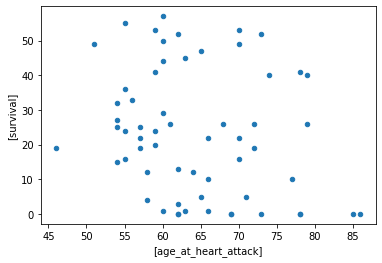

In [66]:
df_ekg.plot(kind='scatter', x=['age_at_heart_attack'], y=['survival']);

In [67]:
# Hypothesis 
from scipy.stats import chisquare 
from scipy.stats import ttest_ind, ttest_1samp

# Null Hypothesis
There is no difference between the average age of a person who survived after a year after their first heart attack and those who did not.

# Alternative Hypothesis
The average age at which one survives or dies within a year of having their first hear attack will differ

In [69]:
# Separtating the survival and deaths a year after heart attack

srate = df_ekg[df_ekg['alive_at_1']== 1] # Still alive after 1 year of heart attack
drate = df_ekg[df_ekg['alive_at_1']== 0] # Not alive after 1 year of heart attack


In [70]:
srate['age_at_heart_attack'].mean() # This represents the average age of people who were still alive after 1 year of having a heart attack

69.6470588235294

In [71]:
drate['age_at_heart_attack'].mean() # This represnts the average age of people who were dead within 1 year of having a heart attack 

62.27906976744186

In [72]:
ttest_ind(srate['age_at_heart_attack'], drate['age_at_heart_attack']) # T-Test whether or not there is a corralation between people age at the time of their heart attack and surviving after a year. 

Ttest_indResult(statistic=3.162106798584086, pvalue=0.0024916629911857623)

In [76]:
# create some binned categories 
cut_points = [45, 49, 59, 69, 79, 80]
label_names = ['45-49', '50-59', '60-69', '70-79', '80+']
df_ekg['age_svsd'] = pd.cut(df_ekg['age_at_heart_attack'], cut_points, labels=label_names)

df_ekg.head()

,survival,still-alive,age_at_heart_attack,pericardal+effusion,fractional_shortening,epss,lvdd,wall_motion_score,wall_motion_index,mult,name,alive_at_1,svsd,age_svsd
0,19,0,72,0.0,0.380,6.000,4.100,14.0,1.70,0.588,name,0,NaN,70-79
1,16,0,55,0.0,0.260,4.000,3.420,14.0,1.00,1.000,name,0,NaN,50-59
2,57,0,60,0.0,0.253,12.062,4.603,16.0,1.45,0.788,name,0,NaN,60-69
3,19,1,57,0.0,0.160,22.000,5.750,18.0,2.25,0.571,name,0,NaN,50-59
4,26,0,68,0.0,0.260,5.000,4.310,12.0,1.00,0.857,name,0,NaN,60-69


In [77]:
df_ekg['age_svsd'].value_counts()

60-69    22
50-59    19
70-79    16
45-49     1
80+       0
Name: age_svsd, dtype: int64

In [78]:
# FREQUENTIST APPROACH
# calculate a 95% confidence interval on either side of this.

conf_freq=stats.t.interval(0.95,                    # alpha (ie, confidence level)
                 len(df_ekg['alive_at_1']),                 # length of sample
                 loc = np.mean(df_ekg['alive_at_1']),      # sample mean
                 scale = stats.sem(df_ekg['alive_at_1']) # std error of the mean
                 )
conf_freq

(0.16598522471985483, 0.4006814419468118)

In [79]:
# BAYESIAN APPROACH
conf_bayes=stats.bayes_mvs(df_ekg['alive_at_1'], alpha=.95)[0][1] # alpha is the confidence level for this equation
conf_bayes

(0.16594430237558652, 0.4007223642910801)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


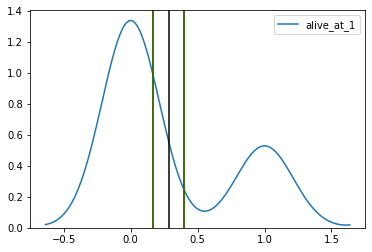

In [81]:
# plot on graph with kernel density estimate
import seaborn as sns

sns.kdeplot(df_ekg['alive_at_1'])
# plt.xlim(.3703, .3705)
plt.axvline(x=conf_freq[0], color='red')
plt.axvline(x=conf_freq[1], color='red')
plt.axvline(x=conf_bayes[0], color='green')
plt.axvline(x=conf_bayes[1], color='green')
plt.axvline(x=np.mean(df_ekg['alive_at_1']), color='k');

## Part 3 - Analysis and Interpretation

Now that you've looked at the data, answer the following questions:

- Interpret and explain the two t-tests you ran - what do they tell you about the relationships between the continuous features you selected and the class labels?
- Interpret and explain the two Chi-squared tests you ran - what do they tell you about the relationships between the categorical features you selected and the class labels?
- What was the most challenging part of this sprint challenge?

Answer with text, but feel free to intersperse example code/results or refer to it from earlier.

Because of a pvalue of 0.0024 I reject the null hypothesis and instead accept the alternate hypothesis that , from this sample, there is a significant difference between the age of those who survived for a year after their heart attack and those who did not. 



## Part 4 - Bayesian vs Frequentist Statistics

Using a minimum of 2-3 sentences, give an explanation of Bayesian and Frequentist statistics, and then compare and contrast these two approaches to statistical inference.



In the Bayesian statistics, probability measures a 'degree of belief', and it links those degrees of belief in assersion of the data before and after accounting for evidence. 
> **Example:** 
>  - P(A), the prior, is the initial degree of belief in A
>  - P(A|B), the posterior, is the degree of belief after incorporating news that B is true
>  - The quotient P(B|A)/P(B) represents the support B provides for A

Frequentist Statistics measures a portion of outcomes. 
> **Example:** 
> Suppose an experiment is performed many times
> - P(A) is the proportion of outcomes with property A (the prior) and P(B) is the proportion with property B. 
> - P(B|A) is the proportion of coucomes with propert B out ot the outcomes with property A
> - P(A|B) is the property proportion of those with A out of those with B (the posterior)

# Stretch Goals: 
Do these to get a 3. These are not required in order to pass the Sprint Challenge.

## Part 1: 

Make sure that all of your dataframe columns have the appropriate data types. *Hint:* If a column has the datatype of "object" even though it's made up of float or integer values, you can coerce it to act as a numeric column by using the `pd.to_numeric()` function. In order to get a 3 on this section make sure that your data exploration is particularly well commented, easy to follow, and thorough.

## Part 2:

Write functions that can calculate t-tests and chi^2 tests on all of the appropriate column combinations from the dataset. (Remember that certain tests require certain variable types.)

## Part 3: 

Calculate and report confidence intervals on your most important mean estimates (choose at least two). Make some kind of a graphic or visualization to help us see visually how precise these estimates are.

## Part 4:

Give an extra awesome explanation of Bayesian vs Frequentist Statistics. Maybe use code or visualizations, or any other means necessary to show an above average grasp of these high level concepts.

In [ ]:
# You can work the stretch goals down here or back up in their regular sections
# just make sure that they are labeled so that we can easily differentiate
# your main work from the stretch goals.